## library import

In [84]:
import pandas as pd
import matplotlib.pyplot as plt

## data read

In [85]:
data = pd.read_csv('../data/train.csv', encoding='euckr')

In [86]:
data['day_of_week']

0          목
1          목
2          일
3          금
4          화
          ..
4701212    목
4701213    목
4701214    월
4701215    수
4701216    화
Name: day_of_week, Length: 4701217, dtype: object

## day_of_week number mapping

In [87]:
date = {'일' : 0, '월' : 1, '화' : 2, '수' : 3, '목' : 4, '금': 5, '토': 6}
data['day_of_week'] = data['day_of_week'].map(date)

In [88]:
data['day_of_week']

0          4
1          4
2          0
3          5
4          2
          ..
4701212    4
4701213    4
4701214    1
4701215    3
4701216    2
Name: day_of_week, Length: 4701217, dtype: int64

## sunday data dist

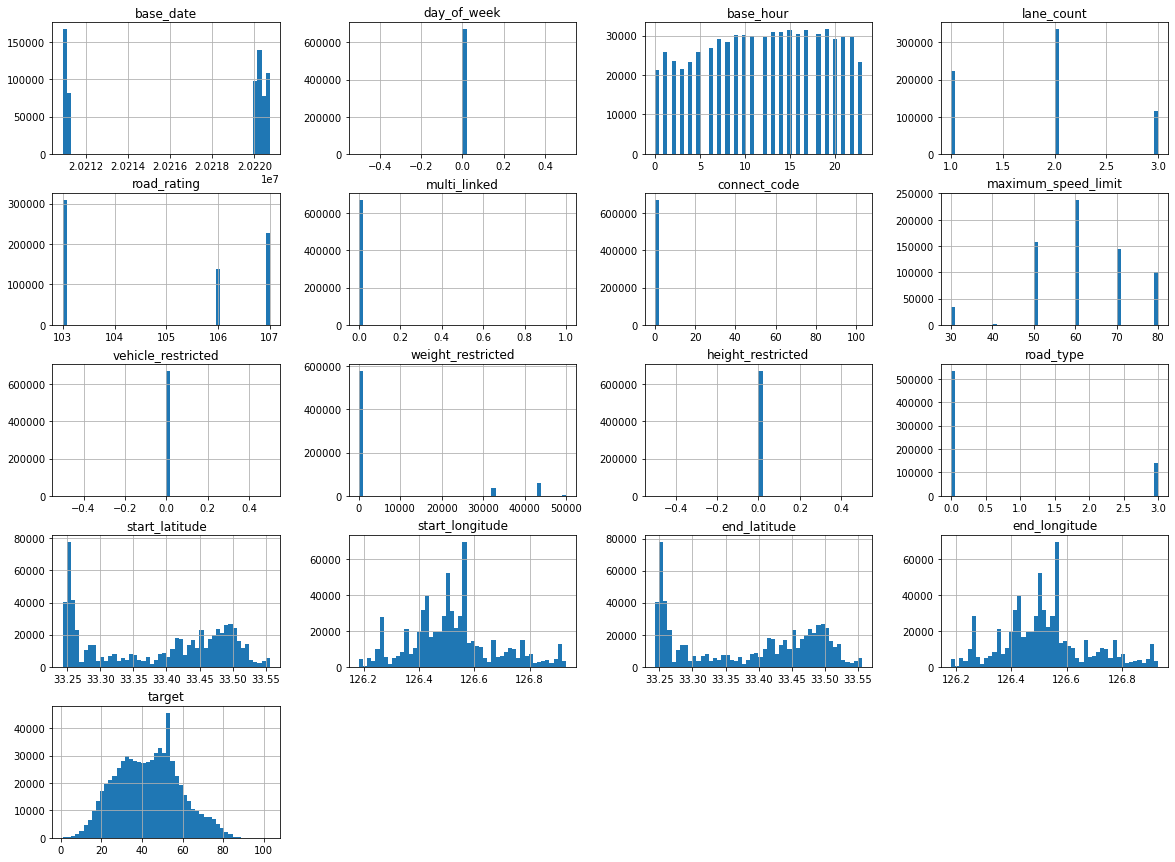

In [89]:
sun_data = data[data['day_of_week'] == 0]
sun_data.hist(bins=50, figsize=(20, 15))
plt.show()

## tuesday data dist

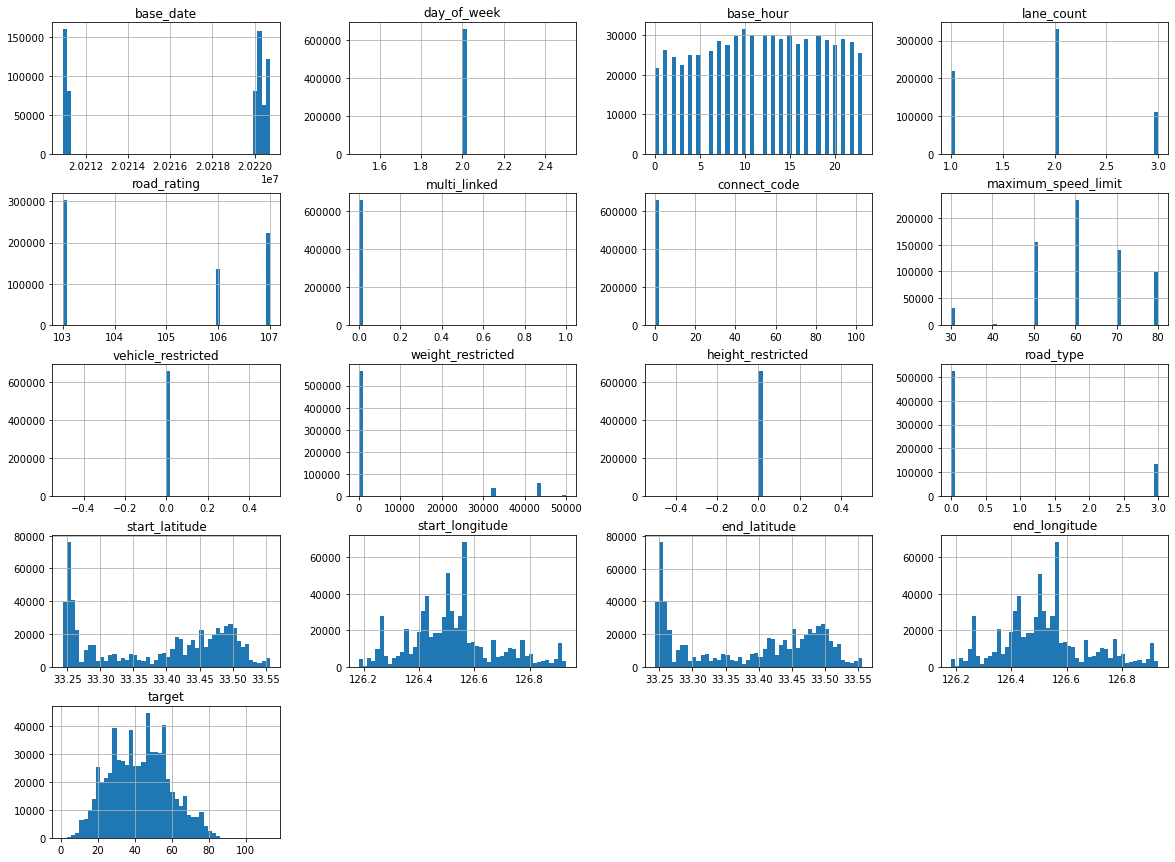

In [68]:
tue_data =  data[data['day_of_week'] == 2]
tue_data.hist(bins=50, figsize=(20, 15))
plt.show()

## zero hour dist

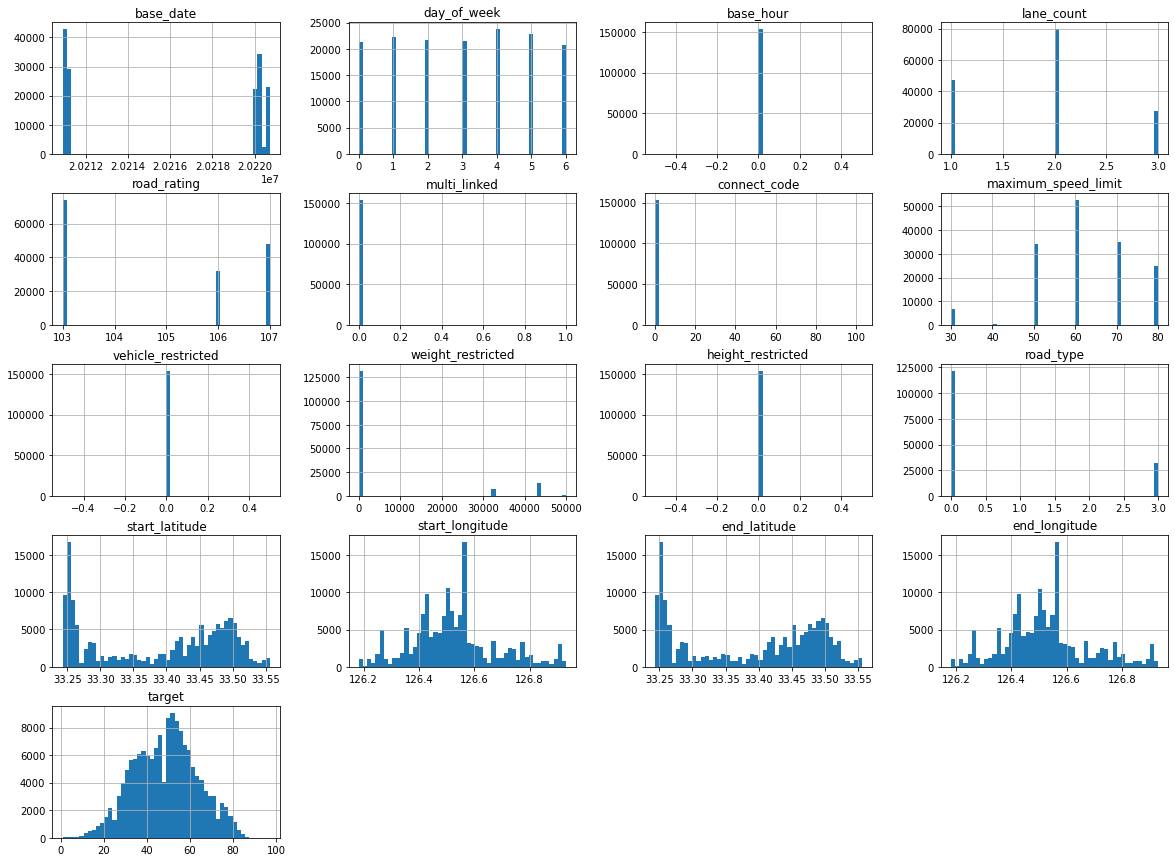

In [74]:
zero_hour_data = data[data['base_hour'] == 0]
zero_hour_data.hist(bins=50, figsize=(20, 15))
plt.show()

## one hour dist

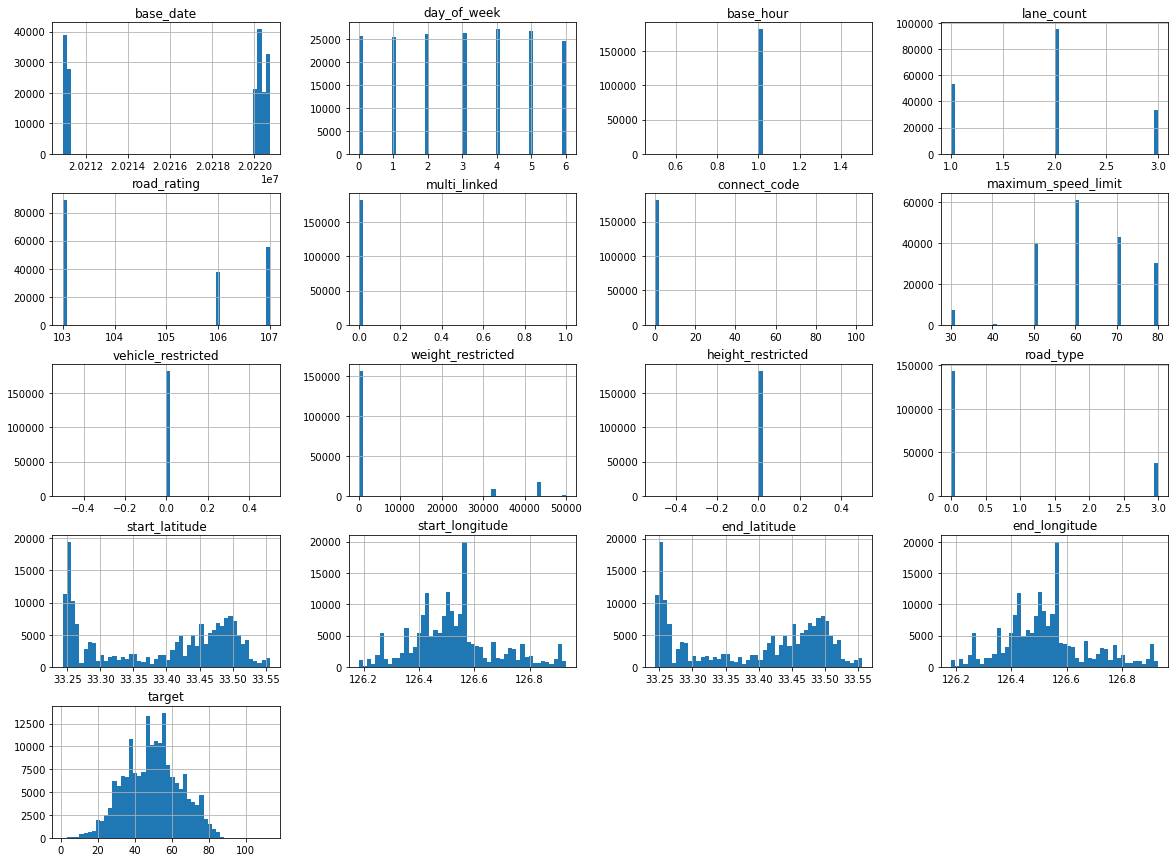

In [91]:
one_hour_data = data[data['base_hour'] == 1]
one_hour_data.hist(bins=50, figsize=(20, 15))
plt.show()